In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Edgar Allan Poe's short stories corpus

In [2]:
df = pd.read_csv('eapoe-stories-corpus.csv')
df.head()

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835


This dataframe consists of 70 rows, each containing title, story text, genre and date of publication

Let's see what are all the genres:

In [3]:
df.classification.unique()

array(['Adventure', 'Parody', 'Humor', 'Adventure,Science_fiction',
       'Horror', 'Romance', 'Horror,Humor', 'Sketch', 'Satire',
       'Hoax,Science_fiction', 'Science_fiction', 'Horror,Satire',
       'Fantasy,Horror', 'Humor,Satire', 'Hoax,Horror,Science_fiction',
       'Fantasy', 'Detective_fiction', 'Horror,Ratiocination',
       'Detective_fiction,Satire', 'Hoax,Satire', 'Essay', 'Fiction,Hoax'],
      dtype=object)

In [4]:
df.sort_values(by='classification').head()

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841
37,THE GOLD-BUG,What ho! what ho! this fellow is dancing mad! ...,The Gold-Bug,June 1843,Dollar Newspaper,Adventure,?,June 1843
19,MS FOUND IN A BOTTLE,Qui n’a plus qu’un moment a vivre N’a plus rie...,MS. Found in a Bottle,"October 19, 1833",Baltimore Saturday Visiter,Adventure,?,October 1833
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844
45,THE MURDERS IN THE RUE MORGUE,"What song the Syrens sang, or what name Achill...",The Murders in the Rue Morgue,April 1841,Graham's Magazine,Detective_fiction,?,April 1841


## Frequent words

To calculate most frequent words I use CountVectorizer with stop_words = 'english' which will eliminate words that don't matter that much.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,1),max_df=1.,min_df=1,
                             stop_words='english',token_pattern=r"(?u)\b\w+\b",max_features=10000)

#matrix of word count
X=vectorizer.fit_transform(df['text'])

### by title

With the function below we can find out what are the most frequent words if we want to specify the title of the story.

In [6]:
#get most frequent words in the story
#input: title of the story

def freq_words_title(title):
    print('Most frequent words of:',title)
    
    title_ind = df[df['title']==title].index

    word_ind = X[title_ind,:].toarray()[0]>0 # only the words used in that story
    title_word = np.asarray(vectorizer.get_feature_names())[word_ind]
    df2 = pd.DataFrame(
        np.asarray(X[title_ind,word_ind]).reshape(-1,),
        index=title_word,columns=list(['count']))
    
    return df2.sort_values(by='count',ascending=False)

In [7]:
story = freq_words_title('THE MURDERS IN THE RUE MORGUE')
story.head(15)

Most frequent words of: THE MURDERS IN THE RUE MORGUE


,count
voice,42
said,35
dupin,29
l,28
house,27
head,25
door,23
room,22
frenchman,21
did,21


This story is about a man named Dupin who rents a room in a strange house, where the last guest was a French student and so we can find out from the most frequent words calculated with vectorizer.

### by random number

If we don't care about the title we can pick a random number from the dataframe above.

In [8]:
#pick a random number of a story
#range 0-69

def freq_words_random(number):
    if number>-1 and number<70:
        print('Most frequent words of:',df[df.index==number].title)

        title_ind = pd.Index([number])

        word_ind = X[title_ind,:].toarray()[0]>0 # only the words used in that story
        title_word = np.asarray(vectorizer.get_feature_names())[word_ind]
        df2 = pd.DataFrame(
            np.asarray(X[title_ind,word_ind]).reshape(-1,),
            index=title_word,columns=list(['count']))

        return df2.sort_values(by='count',ascending=False)
    else:
        print('Choose a number between 0 and 69.')
        return

In [9]:
story = freq_words_random(19)
story.head()

Most frequent words of: 19    MS FOUND IN A BOTTLE
Name: title, dtype: object


,count
ship,27
like,12
sea,11
deck,10
wind,10


From the title and the table it's easy to guess that this story is set on the sea.

## Comparing two stories

Let's compare any two stories and see if they have any frequent words in common

In [10]:
def compare(s1,s2):
    story1 = freq_words_random(s1)
    story2 = freq_words_random(s2)

    compare_df = story1.join(story2,how='inner',lsuffix='_first', rsuffix='_second') #joined table
    return compare_df.sort_values(by='count_first', ascending=False)

In [11]:
compare(19,34).head()

Most frequent words of: 19    MS FOUND IN A BOTTLE
Name: title, dtype: object
Most frequent words of: 34    THE DUC DE L’OMELETTE
Name: title, dtype: object


,count_first,count_second
like,12,2
little,7,1
moment,6,1
eyes,5,3
age,5,1


These two clearly don't have much in common.

## Finding most and least similar story

Given we have read a story of E.A. Poe and want to decide on another one, we can look for most similar or least similar - depending on whether we liked the first one. Here I'm looking for comparison to one I've read recently - 'The Murders in the Rue Morgue'.

## Length of each story

In [12]:
tokenizer = vectorizer.build_tokenizer()
def get_story_length(row):
    return len(tokenizer(row['text']))

df['story_length'] = df.apply(get_story_length,axis=1)
df.sort_values(by='story_length', ascending=False)[['title','classification','story_length']][0:10]

,title,classification,story_length
66,THE MYSTERY OF MARIE ROGET,Detective_fiction,19941
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,"Hoax,Science_fiction",18754
45,THE MURDERS IN THE RUE MORGUE,Detective_fiction,13922
37,THE GOLD-BUG,Adventure,13846
52,THE SPECTACLES,Humor,9527
63,MAELZEL’S CHESS-PLAYER,Essay,9435
60,WHY THE LITTLE FRENCHMAN WEARS HIS HAND IN A S...,Humor,8552
61,WILLIAM WILSON,Horror,8079
41,"THE LITERARY LIFE OF THINGUM BOB, ESQ",Humor,7761
36,THE FALL OF THE HOUSE OF USHER,Horror,7215


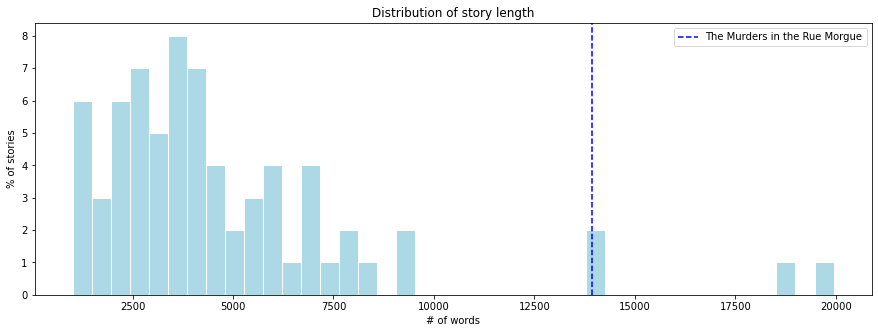

In [13]:
plt.figure(figsize=(15,5))

plt.hist(df['story_length'], 40,  color='lightblue', edgecolor='white')
plt.axvline(x=df['story_length'][df['title']=='THE MURDERS IN THE RUE MORGUE'].values[0], color='blue',ls='--',label='The Murders in the Rue Morgue')

plt.title('Distribution of story length')
plt.xlabel('# of words')
plt.ylabel('% of stories')
plt.legend()

Most stories consist of up to 5000 words. How many pages would that be?   

1000 words of normalized text (Times New Roman, 12 pt font and 1.5 spacing) is about 3 pages.

So we know where to look if we want to find a story of similar length. But in most cases this isn't the criteria. We usually care for the content, so the meaning of words comes first. We can now compare two stories by knowing their titles or picking a random number. But I want to look throught the whole data I have and  don't know the title of each story written by E.A. Poe. So, to find the best matches it's necessary to compute distance between each story.

### Euclidean distance

In [14]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X[:,:],X[df[df['title']=='THE MURDERS IN THE RUE MORGUE'].index,:],metric='euclidean',n_jobs=-1)

df['dist-eucl'] = dist[:,0]
df.sort_values(by='dist-eucl',ascending=True)[0:5] 

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date,story_length,dist-eucl
45,THE MURDERS IN THE RUE MORGUE,"What song the Syrens sang, or what name Achill...",The Murders in the Rue Morgue,April 1841,Graham's Magazine,Detective_fiction,?,April 1841,13922,0.000000
54,THE SYSTEM OF DOCTOR TARR AND PROFESSOR FETHER,"DURING the autumn of 18—, while on a tour thro...",The System of Doctor Tarr and Professor Fether,November 1845,Graham's Magazine,Humor,?,November 1845,6931,163.508410
61,WILLIAM WILSON,"What say of it? what say of CONSCIENCE grim, T...",William Wilson,October 1839,The Gift: A Christmas and New Year's Present f...,Horror,?,October 1839,8079,163.856645
51,THE PURLOINED LETTER,Nil sapientiae odiosius acumine nimio. Seneca....,The Purloined Letter,"December, 1844",The Gift: A Christmas and New Year's Present,Detective_fiction,?,December 1844,7100,164.131045
36,THE FALL OF THE HOUSE OF USHER,Son coeur est un luth suspendu; Sitôt qu’on le...,The Fall of the House of Usher,September 1839,Burton's Gentleman's Magazine,Horror,?,September 1839,7215,164.648110


I liked my story and I want to read a similar one - in that case I should pick e.g. 'THE SYSTEM OF DOCTOR TARR AND PROFESSOR FETHER'

Let's look up similar words.

In [15]:
compare(45,54)

Most frequent words of: 45    THE MURDERS IN THE RUE MORGUE
Name: title, dtype: object
Most frequent words of: 54    THE SYSTEM OF DOCTOR TARR AND PROFESSOR FETHER
Name: title, dtype: object


,count_first,count_second
voice,42,5
said,35,33
house,27,8
head,25,6
door,23,3
...,...,...
sprang,1,1
bade,1,1
bare,1,1
spirits,1,1


The word 'said' is frequent in both but it's not very meaningful and probably shows up in every story with dialogue...

Let's give the Euclidean distance another try. What if I didn't like my picked story?

In [16]:
df.sort_values(by='dist-eucl',ascending=False)[0:5] 

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date,story_length,dist-eucl
66,THE MYSTERY OF MARIE ROGET,A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.” ...,?,November 1842,?,Detective_fiction,?,November 1842,19941,249.142529
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,"BY late accounts from Rotterdam, that city see...",?,June 1835,?,"Hoax,Science_fiction",?,June 1835,18754,240.937751
63,MAELZEL’S CHESS-PLAYER,PERHAPS no exhibition of the kind has ever eli...,?,April 1836,?,Essay,?,April 1836,9435,222.018017
60,WHY THE LITTLE FRENCHMAN WEARS HIS HAND IN A S...,IT’S on my visiting cards sure enough (and it’...,Why the Little Frenchman Wears His Hand in a S...,"August 17, 1839",Tales of the Grotesque and Arabesque,Humor,?,August 1839,8552,216.624098
37,THE GOLD-BUG,What ho! what ho! this fellow is dancing mad! ...,The Gold-Bug,June 1843,Dollar Newspaper,Adventure,?,June 1843,13846,212.499412


In that case I could go as "far" as possible and turns out I should pick up 'THE MYSTERY OF MARIE ROGET' which, surprisingly, is a sequel to the one I've read! Didn't expect that for sure!

In [17]:
compare(45,66)

Most frequent words of: 45    THE MURDERS IN THE RUE MORGUE
Name: title, dtype: object
Most frequent words of: 66    THE MYSTERY OF MARIE ROGET
Name: title, dtype: object


,count_first,count_second
voice,42,1
said,35,12
dupin,29,12
l,28,32
house,27,8
...,...,...
advantages,1,2
vicinity,1,12
violence,1,8
actually,1,1


The result is expected, since it's a totally different story it shouldn't have many words in common. Still, "said" or "did" isn't very meaningful to me.

### TF-IDF

Since the first method gave me a weird result, now I'll try to compute TF-IDF and see what it tells me.

In vectorizer my option for stop_words was 'english' but still I could see many words occuring frequently but having little meaning e.g. "said" or "did". TF-IDF helps eliminate those extremely frequent words by penalizing too common words. This should give better results for similar stories.

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,1),max_df=1.,min_df=1,stop_words='english',token_pattern=r"(?u)\b\w+\b") 
X=vectorizer.fit_transform(df['text'])

tfidf=TfidfTransformer(smooth_idf=False, norm=None)
Y = tfidf.fit_transform(X)

In [19]:
#recomputing distances for TF_IDF
dist = pairwise_distances(Y[:,:],Y[df[df['title']=='THE MURDERS IN THE RUE MORGUE'].index,:],metric='euclidean',n_jobs=-1)

df['dist-eucl-TF-IDF'] = dist[:,0]
df.sort_values(by='dist-eucl-TF-IDF',ascending=True)[['title','dist-eucl-TF-IDF']][0:10]

,title,dist-eucl-TF-IDF
45,THE MURDERS IN THE RUE MORGUE,0.000000
27,THE BLACK CAT,459.103085
55,THE TELL-TALE HEART,461.032272
53,THE SPHINX,461.160117
42,THE MAN OF THE CROWD,463.579751
47,THE OVAL PORTRAIT,463.866208
22,SHADOW—A PARABLE,463.877372
38,THE IMP OF THE PERVERSE,464.040200
39,THE ISLAND OF THE FAY,467.578655
62,* PHILOSOPHY OF FURNITURE,468.078572


Now the story I should read according to first method here isn't even in the top 10. However, 'THE BLACK CAT' was the 5th most similar story before and now it's no.1.

What about the most different one?

In [20]:
df.sort_values(by='dist-eucl-TF-IDF',ascending=False)[['title','dist-eucl-TF-IDF']][0:10]

,title,dist-eucl-TF-IDF
66,THE MYSTERY OF MARIE ROGET,805.203421
37,THE GOLD-BUG,715.926714
63,MAELZEL’S CHESS-PLAYER,714.056597
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,688.460021
60,WHY THE LITTLE FRENCHMAN WEARS HIS HAND IN A S...,685.534694
41,"THE LITERARY LIFE OF THINGUM BOB, ESQ",641.585651
57,THOU ART THE MAN,577.003375
52,THE SPECTACLES,566.969656
65,THE BALLOON-HOAX,532.243151
67,THE POETIC PRINCIPLE,529.456660


The sequel is still the least similar. The rest of the most different stories are still on similar positions.

### cosine distance

We want to be able to compare stories of verying lengths - just because one is shorter than the other doesn't mean they can't be similar. To do that it's necessary to use cosine distance.

In [21]:
dist = pairwise_distances(Y[:,:],Y[df[df['title']=='THE MURDERS IN THE RUE MORGUE'].index,:],metric='cosine',n_jobs=-1)

df['dist-cos-TF-IDF'] = dist[:,0]
df.sort_values(by='dist-cos-TF-IDF',ascending=True)[['title','dist-cos-TF-IDF']][0:10]

,title,dist-cos-TF-IDF
45,THE MURDERS IN THE RUE MORGUE,0.000000
51,THE PURLOINED LETTER,0.694988
66,THE MYSTERY OF MARIE ROGET,0.719016
27,THE BLACK CAT,0.806390
36,THE FALL OF THE HOUSE OF USHER,0.810188
54,THE SYSTEM OF DOCTOR TARR AND PROFESSOR FETHER,0.811667
52,THE SPECTACLES,0.812586
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,0.824767
61,WILLIAM WILSON,0.827324
14,LOSS OF BREATH,0.836259


Another proposition - if i liked my story I should pick "The Purloined Letter". What's more surprising - the sequel no longer is at the end of the list! It's actually second! Now that's more likely.

## Nearest neighbours

Let's look for nearest neighbours a.k.a. stories most similar to the one I picked ("The Murders in the Rue Morgue") depending on the method computing similarities (distance). I'm choosing to find 15 of them.

In [22]:
#data frame with neighbours
similars_cosine = df.sort_values(by='dist-cos-TF-IDF',ascending=True)[0:15].story_length
similars_eucl = df.sort_values(by='dist-eucl-TF-IDF',ascending=True)[0:15].story_length

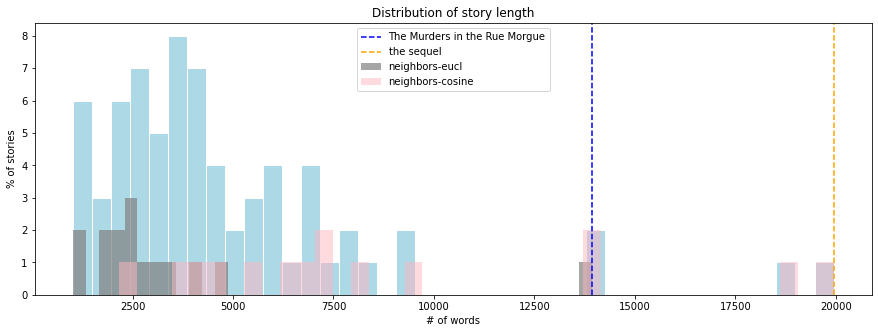

In [23]:
plt.figure(figsize=(15,5))

plt.hist(df['story_length'], 40,  color='lightblue', edgecolor='white')
plt.axvline(x=df['story_length'][df['title']=='THE MURDERS IN THE RUE MORGUE'].values[0], color='blue',ls='--',label='The Murders in the Rue Morgue')
plt.axvline(x=df['story_length'][df['title']=='THE MYSTERY OF MARIE ROGET'].values[0], color='orange', ls='--',label='the sequel')
plt.hist(similars_eucl, 40, color='grey', histtype='stepfilled', label='neighbors-eucl', alpha=0.7)
plt.hist(similars_cosine, 40, color='lightpink', histtype='stepfilled', label='neighbors-cosine', alpha=0.5)

plt.title('Distribution of story length')
plt.xlabel('# of words')
plt.ylabel('% of stories')
plt.legend()

The 15 nearest neighbors found using cosine distance are a sampling across the range of story lengths. Euclidean method focuses more on shorter stories.

Cosine distance ignore stories lengths and that's good - as I said before this isn't usually the criteria for picking up a similar story. 

Now let's see where lie exactly the most and least similar stories

In [24]:
#cosine
sim_cos = df.sort_values(by='dist-cos-TF-IDF',ascending=True)[1:2].title
diff_cos = df.sort_values(by='dist-cos-TF-IDF',ascending=False)[0:1].title

#euclidean
sim_eucl= df.sort_values(by='dist-eucl',ascending=True)[1:2].title
diff_eucl = df.sort_values(by='dist-eucl',ascending=False)[0:1].title

print('Most similar(cosine):',sim_cos)
print('Most similar(euclidean):',sim_eucl)
print('Least similar(cosine):',diff_cos)
print('Least similar(euclidean):',diff_eucl)

Most similar(cosine): 51    THE PURLOINED LETTER
Name: title, dtype: object
Most similar(euclidean): 54    THE SYSTEM OF DOCTOR TARR AND PROFESSOR FETHER
Name: title, dtype: object
Least similar(cosine): 49    THE POWER OF WORDS
Name: title, dtype: object
Least similar(euclidean): 66    THE MYSTERY OF MARIE ROGET
Name: title, dtype: object


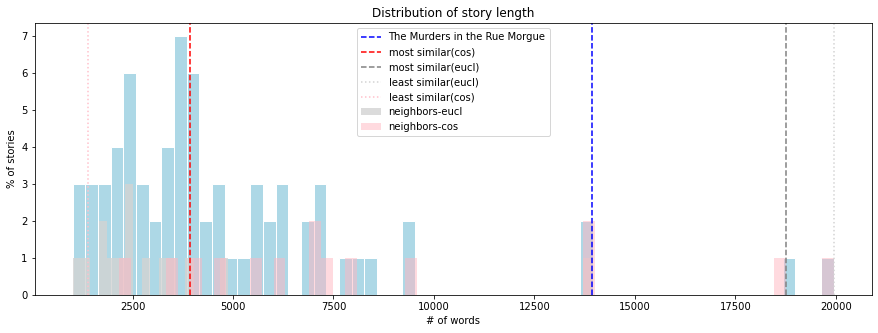

In [25]:
plt.figure(figsize=(15,5))

plt.hist(df['story_length'], 60,  color='lightblue', edgecolor='white')
plt.axvline(x=df['story_length'][df['title']=='THE MURDERS IN THE RUE MORGUE'].values[0], color='blue',ls='--',label='The Murders in the Rue Morgue')
plt.hist(similars_eucl, 60, color='lightgrey', histtype='stepfilled', label='neighbors-eucl', alpha=0.8)
plt.hist(similars_cosine, 60, color='lightpink', histtype='stepfilled', label='neighbors-cos', alpha=0.5)

plt.axvline(x=df['story_length'][df['title']=='THE BLACK CAT'].values[0], color='red',ls='--',label='most similar(cos)')
plt.axvline(x=df['story_length'][df['title']=='THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL'].values[0], color='grey', ls='--',label='most similar(eucl)')
plt.axvline(x=df['story_length'][df['title']=='THE MYSTERY OF MARIE ROGET'].values[0], color='lightgrey', ls=':',label='least similar(eucl)')
plt.axvline(x=df['story_length'][df['title']=='THE POWER OF WORDS'].values[0], color='pink',ls=':',label='least similar(cos)')


plt.title('Distribution of story length')
plt.xlabel('# of words')
plt.ylabel('% of stories')
plt.legend()

Similar stories are on different ends of distribution. Euclidean one is a lot closer in length. Most similar story according to cosine method is much shorter, but that doesn't exclude her from the possibility of being its best neighbour.

As I remember from above, Euclidean returns the sequel as the least similar one, while cosine method puts this story as second most similar and I think here the difference in methods is most clearly visible.